In this project, we are a exploring [car dataset](https://archive.ics.uci.edu/ml/datasets/auto+mpg) to analyze their fuel efficiencies.


## Dataset Attribute Information

1. **mpg**: Miles per gallon. This is one primary measurement for car fuel efficiency.
2. **displacement** : The cylinder volumes in cubic inches.
3. **horsepower** : Engine power.
4. **weight** : In pounds.
5. **acceleration** : The elapsed time in seconds to go from 0 to 60mph.
6. **origin** : Region of origin.

In [3]:
import numpy as np
import seaborn as sns
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics
import plotly.express as px
import pandas as pd
import matplotlib.pyplot as plt

## Exploratory Analysis

### Correlation Matrix

      mpg  displacement  horsepower  weight  acceleration
0    18.0         307.0       130.0  3504.0          12.0
1    15.0         350.0       165.0  3693.0          11.5
2    18.0         318.0       150.0  3436.0          11.0
3    16.0         304.0       150.0  3433.0          12.0
4    17.0         302.0       140.0  3449.0          10.5
..    ...           ...         ...     ...           ...
387  27.0         140.0        86.0  2790.0          15.6
388  44.0          97.0        52.0  2130.0          24.6
389  32.0         135.0        84.0  2295.0          11.6
390  28.0         120.0        79.0  2625.0          18.6
391  31.0         119.0        82.0  2720.0          19.4

[392 rows x 5 columns]


<Axes: >

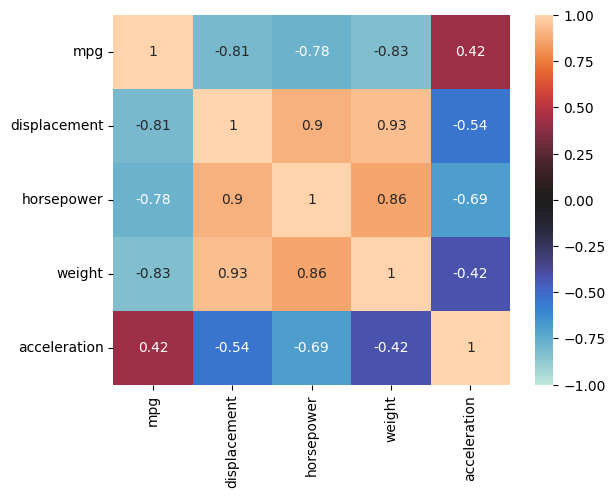

In [4]:
data = pd.read_csv('auto-mpg.csv')
data.drop('origin', inplace=True, axis=1)
print(data)
sns.heatmap(data.corr(), annot = True, vmin=-1, vmax=1, center= 0)

### Pairplot

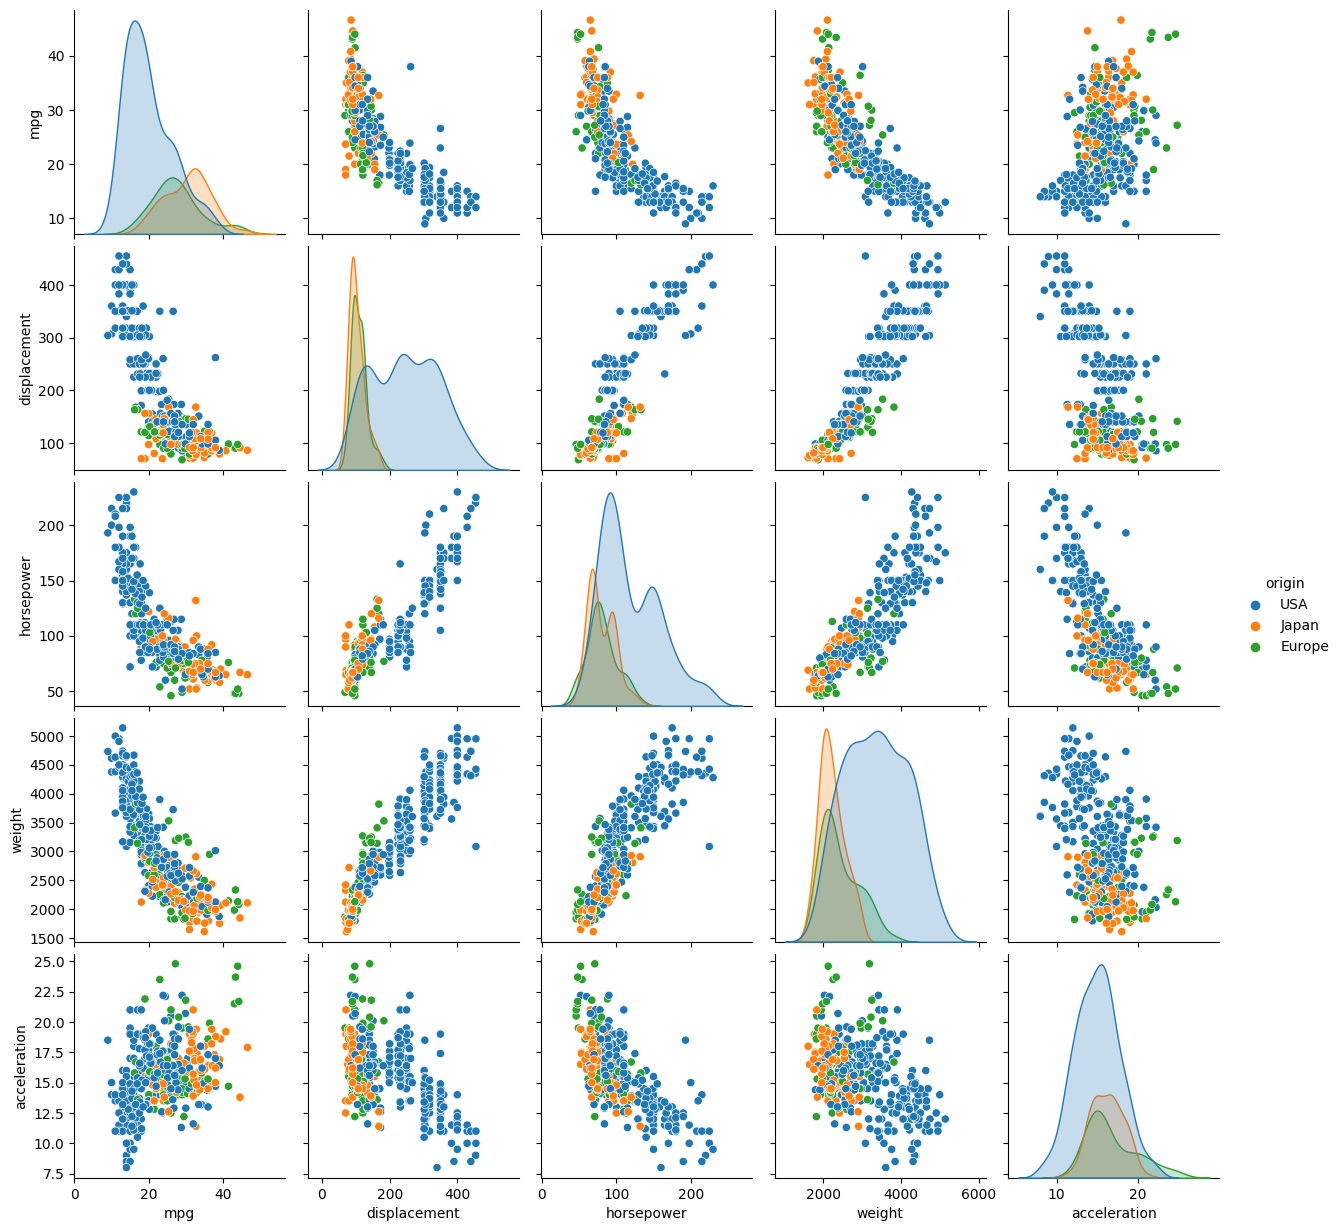

In [5]:
data = pd.read_csv('auto-mpg.csv')
sns.pairplot(data, hue='origin')

## Linear and Polynomial Regression

In [6]:
len(data) * .8
data = data.sample(frac = 1, random_state=48)
trainSet = data[:314]
testSet = data[314:]

### Simple Linear Regression

In [7]:
X_train = trainSet[['weight']]
X_test = testSet[['weight']]
y_train = trainSet['mpg']
y_test = testSet['mpg']

model = linear_model.LinearRegression()
model.fit(X_train,y_train)

prediction = model.predict(X_test)
print("MSE for linear regression model with weight as feature: ", metrics.mean_squared_error(y_test,prediction))

MSE for linear regression model with weight as feature:  16.199719298066448


### Polynomial Regression

In [8]:
for i in (2, 3, 4):
  poly = PolynomialFeatures(degree=i, include_bias=False)
  polyTrain = poly.fit_transform(X_train)
  polyTest = poly.fit_transform(X_test)

  polyModel = linear_model.LinearRegression()
  polyModel.fit(polyTrain, y_train)

  predictionTrain = polyModel.predict(polyTrain)
  print(f"train MSE for polynomial regression model with degree {i}: ", metrics.mean_squared_error(y_train,predictionTrain))

  predictionTest = polyModel.predict(polyTest)
  print(f"test MSE for polynomial regression model with degree {i}: ", metrics.mean_squared_error(y_test,predictionTest))

train MSE for polynomial regression model with degree 2:  18.05332875886823
test MSE for polynomial regression model with degree 2:  14.332734589916676
train MSE for polynomial regression model with degree 3:  18.053259342151996
test MSE for polynomial regression model with degree 3:  14.332103960732102
train MSE for polynomial regression model with degree 4:  18.02911774206081
test MSE for polynomial regression model with degree 4:  14.357588509582436


## Logistic Regression

In [9]:
USJdata = data[data["origin"].isin(["USA", "Japan"])]
print(len(USJdata) * .8)
data = data.sample(frac = 1, random_state=48)
trainSet = USJdata[:260]
testSet = USJdata[260:]

259.2


In [10]:
X_train = trainSet[['mpg','displacement','horsepower','weight','acceleration']]
X_test = testSet[['mpg','displacement','horsepower','weight','acceleration']]
y_train = [i == 'USA' for i in trainSet['origin']]
y_test = [i == 'USA' for i in testSet['origin']]

model = linear_model.LogisticRegression()
model.fit(X_train,y_train)
predictions = model.predict(X_test)

# make USA positive and Japan negative

TP = np.sum(np.logical_and(predictions, y_test))
FP = np.sum(np.logical_and(predictions, np.logical_not(y_test)))
TN = np.sum(np.logical_and(np.logical_not(predictions), np.logical_not(y_test)))
FN = np.sum(np.logical_and(np.logical_not(predictions), y_test))

print("Precision USA: ", str(TP/(TP + FP)))
print("Recall USA: ", str(TP/(TP + FN)))

predictions = [not i for i in predictions]
y_test = [i == 'Japan' for i in testSet['origin']]

TP = np.sum(np.logical_and(predictions, y_test))
FP = np.sum(np.logical_and(predictions, np.logical_not(y_test)))
TN = np.sum(np.logical_and(np.logical_not(predictions), np.logical_not(y_test)))
FN = np.sum(np.logical_and(np.logical_not(predictions), y_test))

print("Precision Japan: ", str(TP/(TP + FP)))
print("Recall Japan: ", str(TP/(TP + FN)))

Precision USA:  0.94
Recall USA:  0.8867924528301887
Precision Japan:  0.5714285714285714
Recall Japan:  0.7272727272727273


### Model coefficients analysis

[[-0.10856447  0.13042708 -0.14197705 -0.00118662  0.14630629]]


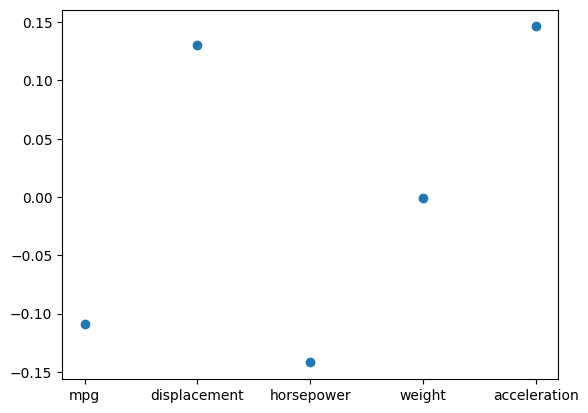

In [11]:
theta = model.coef_
print(theta)
plt.scatter(X_train.columns,theta)

Based on the scatterplot, the displacement, horsepower, and acceleration have the highest contributions to the ŷ prediction as they are the furthest away from y = 0 (highest magnitudes). We labeled USA as 1 and Japan as 0. For displacement, we have a coefficient of .13, so e$^{.13} \approx 1.14$ , meaning every unit increase would increase the chance of our car being American by 14%. For horsepower, we have a coefficient of -.14, so e$^{.14} \approx 1.15$ , meaning every unit increase would decrease the chance of our car being American by 15%. For acceleration, we have a coefficient of .14, so e$^{.14} \approx 1.15$ , meaning every unit increase would increase the chance of our car being American by 15%.

This project was mainly based on a CSE 151a (Introduction to Machine Learning) programming assignment taught by Professor Edwin Solares.